The points align closely at time = 3 seconds.


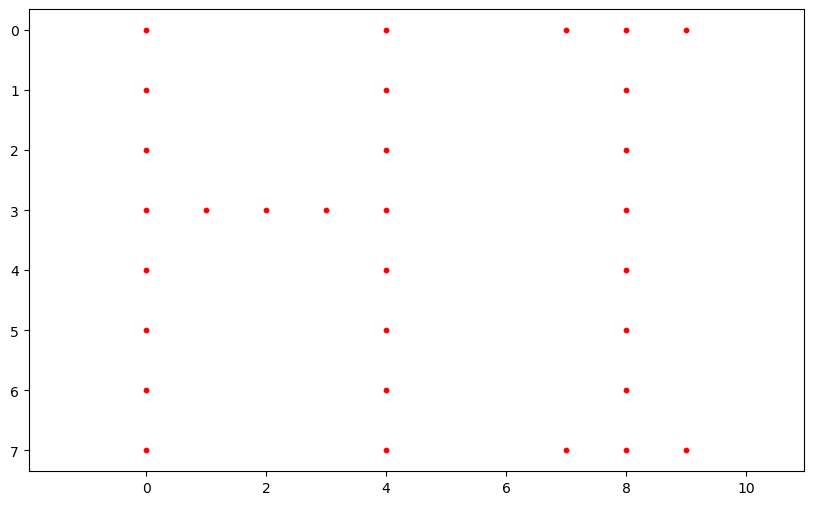

In [ ]:
# Define the constants and functions based on the given code
grid_width = 101
grid_height = 103
time_limit = 100

def get_quadrant(x, y):
    if x == grid_width // 2 or y == grid_height // 2:
        return None  # On the middle line, not in any quadrant
    elif x < grid_width // 2 and y < grid_height // 2:
        return 1  # Top-left quadrant
    elif x >= grid_width // 2 and y < grid_height // 2:
        return 2  # Top-right quadrant
    elif x < grid_width // 2 and y >= grid_height // 2:
        return 3  # Bottom-left quadrant
    elif x >= grid_width // 2 and y >= grid_height // 2:
        return 4  # Bottom-right quadrant

def read_input(data):
    robots = []
    for line in data.strip().split('\n'):
        line = line.strip()
        if line:
            pos_part, vel_part = line.split()
            px, py = map(int, pos_part[2:].split(','))
            vx, vy = map(int, vel_part[2:].split(','))
            robots.append(((px, py), (vx, vy)))
    return robots

def calculate_safety_factor(robots, time_limit):
    for i in range(len(robots)):
        (px, py), (vx, vy) = robots[i]
        px = (px + vx * time_limit) % grid_width
        py = (py + vy * time_limit) % grid_height
        robots[i] = ((px, py), (vx, vy))

    quadrant_counts = {1: 0, 2: 0, 3: 0, 4: 0}
    for (px, py), _ in robots:
        quadrant = get_quadrant(px, py)
        if quadrant:
            quadrant_counts[quadrant] += 1

    safety_factor = (quadrant_counts[1] * quadrant_counts[2] *
                     quadrant_counts[3] * quadrant_counts[4])
    return safety_factor

# Test with the provided sample input
sample_input = """
p=44,70 v=-47,36
p=56,4 v=69,91
p=6,30 v=-52,-60
p=64,4 v=35,44
p=57,22 v=-56,48
p=5,22 v=18,37
p=2,48 v=88,-65
p=80,54 v=28,-40
p=76,0 v=98,4
p=7,89 v=33,-33
p=25,30 v=-15,70
p=92,41 v=35,80
p=39,6 v=-47,-20
p=30,82 v=97,8
p=8,67 v=-44,-59
p=87,24 v=-51,83
p=83,33 v=43,73
p=95,59 v=50,90
p=10,69 v=-47,-44
p=15,15 v=91,98
p=73,21 v=-24,77
p=11,22 v=2,-82
p=87,95 v=65,-42
p=26,47 v=33,-20
p=50,58 v=69,-62
p=88,60 v=12,68
p=82,15 v=-97,10
p=47,83 v=81,-93
p=96,92 v=47,-61
p=1,30 v=18,84
p=21,51 v=49,50
p=49,18 v=-70,-88
p=52,0 v=54,39
p=46,30 v=61,97
p=13,17 v=10,-51
p=72,85 v=21,-45
p=99,57 v=42,49
p=96,26 v=74,8
p=79,31 v=-66,55
p=0,80 v=-3,29
p=19,89 v=56,-45
p=13,85 v=-58,-59
p=34,51 v=-84,-38
p=67,96 v=-10,-42
p=75,1 v=-11,23
p=30,54 v=85,25
p=95,66 v=81,79
p=19,77 v=87,82
p=32,29 v=-85,-22
p=52,73 v=14,52
p=82,84 v=43,93
p=74,88 v=66,-99
p=47,18 v=-71,-31
p=98,71 v=2,36
p=28,70 v=24,-83
p=91,42 v=-90,46
p=54,101 v=69,-53
p=33,77 v=-34,70
p=0,64 v=95,98
p=56,63 v=-17,-37
p=43,88 v=-94,47
p=31,67 v=43,72
p=72,26 v=-96,-14
p=52,6 v=-56,-96
p=41,67 v=39,6
p=15,18 v=-14,-63
p=73,60 v=23,-79
p=20,54 v=95,97
p=66,41 v=96,-36
p=80,0 v=56,-71
p=83,41 v=-11,43
p=59,0 v=44,-64
p=92,20 v=-35,-6
p=85,102 v=44,-73
p=24,20 v=-87,-6
p=99,52 v=24,-66
p=40,54 v=-32,84
p=86,53 v=-10,-5
p=69,43 v=-80,32
p=81,95 v=98,15
p=55,76 v=-76,36
p=93,68 v=28,85
p=52,6 v=38,-96
p=76,22 v=-74,-17
p=7,93 v=63,67
p=83,12 v=18,51
p=42,100 v=-38,37
p=47,22 v=-39,10
p=85,7 v=-19,-12
p=39,5 v=26,-67
p=26,38 v=-38,-63
p=95,34 v=35,-33
p=67,78 v=-96,-17
p=51,52 v=92,-19
p=14,91 v=-6,-83
p=22,83 v=17,-42
p=26,38 v=-55,-73
p=84,76 v=-50,-48
p=15,42 v=72,3
p=68,32 v=-19,-63
p=40,39 v=32,49
p=35,87 v=48,17
p=32,81 v=43,5
p=66,71 v=93,40
p=1,59 v=80,68
p=99,60 v=38,71
p=66,29 v=44,32
p=13,18 v=-29,59
p=27,39 v=-84,5
p=21,96 v=-53,-64
p=49,30 v=-55,-79
p=36,51 v=-81,53
p=38,6 v=-31,-4
p=4,79 v=-84,-34
p=1,1 v=25,-85
p=28,46 v=-89,62
p=79,38 v=-8,-8
p=24,84 v=-45,-75
p=55,23 v=-71,-69
p=55,7 v=90,69
p=37,34 v=39,16
p=62,70 v=83,-32
p=99,84 v=-84,45
p=75,83 v=28,9
p=15,41 v=55,92
p=73,99 v=-64,56
p=65,3 v=4,16
p=17,30 v=-15,-9
p=4,73 v=81,-51
p=13,41 v=-91,54
p=49,47 v=-32,38
p=92,82 v=98,63
p=67,27 v=40,-39
p=49,52 v=-1,19
p=73,83 v=-62,-56
p=8,89 v=92,9
p=97,43 v=18,-81
p=59,30 v=60,78
p=4,43 v=-99,-81
p=36,78 v=47,-14
p=9,79 v=-52,-15
p=36,97 v=39,-83
p=62,15 v=-41,-47
p=50,2 v=-93,-4
p=95,10 v=-65,-87
p=63,69 v=68,71
p=0,96 v=65,80
p=44,74 v=29,46
p=100,77 v=-63,44
p=29,0 v=-46,53
p=58,63 v=-18,93
p=48,7 v=-55,-85
p=2,71 v=-45,-29
p=67,26 v=97,73
p=76,50 v=84,-31
p=68,0 v=-18,-58
p=4,45 v=57,38
p=23,94 v=-30,31
p=41,26 v=-68,5
p=36,52 v=-55,-3
p=33,96 v=7,96
p=61,25 v=99,-1
p=86,52 v=-68,23
p=7,43 v=59,-71
p=52,17 v=53,75
p=27,84 v=-75,-16
p=12,54 v=64,89
p=5,37 v=88,89
p=8,51 v=84,-82
p=97,30 v=-4,84
p=68,8 v=-81,78
p=93,79 v=-36,88
p=55,14 v=-17,58
p=9,65 v=-29,22
p=4,81 v=97,-21
p=99,81 v=89,55
p=18,30 v=-61,-60
p=34,102 v=-15,-88
p=96,42 v=-20,-76
p=25,46 v=-79,41
p=56,44 v=-96,56
p=66,8 v=-57,72
p=36,87 v=79,82
p=64,9 v=59,-23
p=1,49 v=21,6
p=38,59 v=-40,-73
p=41,102 v=5,94
p=19,87 v=57,-83
p=30,75 v=24,85
p=67,83 v=-18,58
p=68,3 v=61,-7
p=43,49 v=48,-16
p=8,99 v=-67,-46
p=42,58 v=68,-62
p=70,35 v=-10,24
p=34,32 v=39,29
p=19,9 v=46,78
p=1,52 v=4,-49
p=41,57 v=77,82
p=32,97 v=-70,-26
p=57,19 v=61,75
p=83,15 v=97,5
p=1,9 v=87,65
p=18,31 v=-61,51
p=76,27 v=85,-29
p=68,29 v=21,21
p=93,29 v=89,-30
p=37,10 v=70,34
p=75,1 v=-96,47
p=92,40 v=-42,-35
p=21,20 v=-61,2
p=84,13 v=16,42
p=60,16 v=68,78
p=33,87 v=94,34
p=53,51 v=45,27
p=24,90 v=71,91
p=30,36 v=68,-46
p=59,32 v=68,-79
p=95,54 v=-90,25
p=51,71 v=-40,14
p=57,100 v=-40,-82
p=31,4 v=-69,80
p=84,38 v=8,41
p=76,5 v=-49,15
p=29,95 v=-7,23
p=31,48 v=46,41
p=71,46 v=-41,27
p=8,54 v=-25,-37
p=12,65 v=-22,-65
p=28,54 v=29,-27
p=81,26 v=-76,-75
p=62,4 v=-17,15
p=54,12 v=-96,56
p=80,42 v=-96,17
p=3,44 v=-13,11
p=35,95 v=69,26
p=30,32 v=-8,29
p=76,85 v=49,-84
p=77,102 v=67,-88
p=1,37 v=-28,-32
p=25,88 v=-77,39
p=83,3 v=-58,-20
p=96,10 v=-20,45
p=61,7 v=94,6
p=84,100 v=-58,-23
p=26,76 v=55,-33
p=20,91 v=-37,20
p=51,22 v=14,-93
p=53,84 v=23,90
p=75,68 v=-25,82
p=45,57 v=-25,46
p=20,97 v=-43,26
p=11,70 v=58,-57
p=11,5 v=-27,57
p=25,81 v=9,-56
p=94,87 v=42,34
p=18,3 v=-45,18
p=59,87 v=84,12
p=88,64 v=75,11
p=12,83 v=-9,-68
p=33,52 v=72,-71
p=29,17 v=-38,53
p=95,5 v=19,-64
p=32,32 v=-11,-9
p=87,96 v=-62,59
p=57,3 v=-78,-91
p=60,88 v=29,39
p=98,27 v=43,-66
p=74,8 v=-77,-14
p=72,98 v=91,-72
p=63,64 v=26,1
p=11,49 v=-90,11
p=24,72 v=-22,44
p=69,72 v=-51,-25
p=61,12 v=52,26
p=24,82 v=-70,71
p=42,16 v=-93,27
p=63,95 v=45,93
p=10,88 v=64,20
p=90,32 v=-89,13
p=69,81 v=44,-57
p=33,37 v=-94,-52
p=27,50 v=49,53
p=80,32 v=28,13
p=76,68 v=5,-86
p=23,51 v=-21,-19
p=22,41 v=-14,73
p=73,54 v=91,68
p=22,46 v=94,89
p=7,73 v=95,71
p=12,63 v=-37,14
p=33,12 v=-56,-13
p=88,67 v=89,79
p=29,44 v=-85,-27
p=63,16 v=91,18
p=25,49 v=-24,33
p=70,76 v=-93,45
p=66,47 v=-96,-49
p=52,33 v=-73,7
p=5,39 v=10,84
p=89,65 v=58,-16
p=5,16 v=-91,34
p=27,95 v=16,12
p=27,0 v=-12,23
p=4,20 v=-6,-3
p=91,25 v=20,17
p=51,99 v=46,12
p=34,73 v=-15,55
p=100,23 v=-82,-49
p=19,80 v=-53,96
p=80,5 v=-19,64
p=50,100 v=-16,-80
p=69,44 v=22,51
p=26,76 v=91,93
p=48,88 v=-24,55
p=68,26 v=86,-23
p=49,95 v=31,-64
p=53,16 v=93,24
p=0,45 v=-36,-8
p=19,71 v=-78,-8
p=62,98 v=42,7
p=22,85 v=-99,6
p=48,48 v=-54,57
p=81,34 v=81,32
p=23,73 v=71,-89
p=57,64 v=-4,-47
p=89,17 v=26,-60
p=49,60 v=-45,47
p=25,16 v=13,-46
p=16,62 v=17,49
p=70,83 v=44,47
p=52,3 v=69,56
p=53,3 v=7,-58
p=59,28 v=-24,-4
p=39,67 v=15,14
p=59,71 v=-79,52
p=81,90 v=-58,47
p=87,6 v=51,50
p=32,58 v=16,-5
p=99,3 v=12,53
p=71,13 v=-49,86
p=93,25 v=4,59
p=54,95 v=25,12
p=66,76 v=45,-2
p=78,102 v=-42,61
p=47,54 v=37,-35
p=91,76 v=74,-2
p=98,87 v=73,-72
p=62,99 v=-3,-58
p=44,85 v=-24,-45
p=2,57 v=-13,-16
p=10,19 v=10,-1
p=87,40 v=51,73
p=77,27 v=67,81
p=35,96 v=-32,61
p=84,83 v=52,-2
p=10,63 v=18,14
p=57,101 v=-17,26
p=100,54 v=-59,-24
p=96,44 v=-20,54
p=11,83 v=2,17
p=17,87 v=9,-35
p=35,54 v=-93,76
p=66,2 v=36,23
p=37,59 v=-31,-81
p=67,36 v=-2,27
p=100,34 v=40,-86
p=52,81 v=-94,-2
p=30,10 v=39,45
p=7,74 v=80,90
p=77,79 v=59,28
p=40,33 v=96,98
p=60,70 v=99,-59
p=25,66 v=48,33
p=87,50 v=97,-19
p=86,6 v=35,99
p=16,51 v=95,60
p=72,31 v=84,27
p=99,18 v=-28,-55
p=95,38 v=-51,84
p=71,40 v=-19,-25
p=63,2 v=-2,37
p=65,80 v=68,-48
p=58,82 v=-40,3
p=79,27 v=59,-36
p=8,60 v=44,-30
p=53,49 v=-40,27
p=64,81 v=38,-91
p=62,55 v=-87,-8
p=46,43 v=7,-11
p=69,37 v=-65,-79
p=31,58 v=46,30
p=61,17 v=-87,37
p=56,98 v=-8,-15
p=62,102 v=-24,-9
p=46,28 v=54,59
p=21,29 v=-69,-71
p=83,65 v=67,38
p=94,52 v=59,65
p=32,47 v=31,5
p=95,34 v=-80,-3
p=32,37 v=-54,-76
p=89,18 v=82,-66
p=28,88 v=-47,9
p=62,20 v=98,-90
p=83,83 v=51,36
p=21,89 v=-83,-7
p=58,31 v=84,-79
p=75,49 v=-11,92
p=44,91 v=-39,12
p=17,82 v=-93,-80
p=94,56 v=-54,-82
p=56,43 v=69,-42
p=9,27 v=50,-41
p=6,49 v=-29,76
p=64,39 v=3,52
p=8,73 v=26,6
p=58,83 v=-64,-64
p=26,94 v=-8,-15
p=20,69 v=88,9
p=7,82 v=-12,96
p=33,25 v=-89,68
p=61,40 v=-34,78
p=25,39 v=56,49
p=60,18 v=-20,-42
p=91,30 v=-65,56
p=80,21 v=44,-77
p=74,102 v=67,-31
p=98,76 v=-53,76
p=21,23 v=87,29
p=75,57 v=-25,-78
p=13,11 v=-6,86
p=84,1 v=-19,-61
p=80,23 v=28,-93
p=24,17 v=-92,-85
p=4,55 v=70,61
p=33,84 v=-29,-69
p=30,82 v=24,-61
p=58,30 v=6,-52
p=1,71 v=3,-51
p=53,69 v=-64,-24
p=68,11 v=61,2
p=22,8 v=-69,-12
p=82,93 v=75,1
p=45,21 v=44,-89
p=11,81 v=-75,-29
p=59,77 v=42,44
p=11,34 v=10,-3
p=25,98 v=-69,58
p=37,55 v=30,-51
p=0,69 v=55,-90
p=89,12 v=35,82
p=58,65 v=-25,-24
p=29,102 v=-69,64
p=36,0 v=12,17
p=94,54 v=70,-56
p=48,95 v=90,-68
p=39,59 v=-94,34
p=23,18 v=-21,21
p=84,91 v=-81,-34
p=70,44 v=21,-95
p=87,73 v=4,-16
p=66,40 v=86,35
p=97,30 v=-82,-90
p=86,46 v=-61,33
p=90,73 v=-65,82
p=49,24 v=7,-44
p=76,77 v=-74,17
p=89,3 v=-56,-59
p=57,99 v=-25,42
p=72,101 v=-65,94
p=77,27 v=-81,-14
p=18,57 v=-84,-70
p=18,68 v=95,95
p=47,4 v=-70,-23
p=52,66 v=91,9
p=40,89 v=-23,-21
p=80,19 v=85,49
p=75,8 v=5,56
p=35,20 v=-32,-58
p=47,100 v=35,-63
p=66,60 v=60,25
p=36,81 v=-7,-86
p=17,55 v=-22,-84
p=47,94 v=54,4
p=75,22 v=-59,-96
p=0,48 v=-51,73
p=22,2 v=-22,64
p=100,29 v=53,59
p=68,5 v=-10,-31
p=42,3 v=-54,-17
p=97,31 v=58,-1
p=79,34 v=99,-30
p=95,66 v=-19,57
p=40,52 v=47,46
p=36,102 v=-67,-58
p=75,98 v=-4,39
p=89,90 v=-52,50
p=54,50 v=30,57
p=20,72 v=-84,-32
"""

robots = read_input(sample_input)
safety_factor = calculate_safety_factor(robots, time_limit)
safety_factor


In [ ]:
# Part 2
import numpy as np
from typing import List, Tuple

def parse_input(filename: str) -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
    """
    Parse input file to extract robot positions and velocities.

    Args:
        filename (str): Path to input file

    Returns:
        List of tuples, each containing (position, velocity)
    """
    robots = []
    with open(filename, 'r') as f:
        for line in f:
            pos_str, vel_str = line.strip().split(' ')
            px, py = map(int, pos_str[2:].split(','))
            vx, vy = map(int, vel_str[2:].split(','))
            robots.append(((px, py), (vx, vy)))
    return robots

def simulate_robots(robots: List[Tuple[Tuple[int, int], Tuple[int, int]]],
                    time: int,
                    width: int,
                    height: int) -> np.ndarray:
    """
    Simulate robot movements and count robot positions after given time.

    Args:
        robots (List): List of robot (position, velocity) tuples
        time (int): Seconds to simulate
        width (int): Space width
        height (int): Space height

    Returns:
        numpy array of robot count per tile
    """
    # Initialize grid to track robot positions
    grid = np.zeros((height, width), dtype=int)

    for (px, py), (vx, vy) in robots:
        # Calculate final position after time, with wraparound
        final_x = (px + vx * time) % width
        final_y = (py + vy * time) % height
        grid[final_y, final_x] += 1

    return grid

def is_christmas_tree(grid: np.ndarray) -> bool:
    """
    Check if the robot positions form a Christmas tree pattern.

    Args:
        grid (numpy array): Robot position grid

    Returns:
        Boolean indicating if a Christmas tree pattern is found
    """
    # Define a potential Christmas tree pattern
    # This is a simplistic representation and might need adjustment
    # based on the actual expected pattern
    tree_pattern = [
        [0, 0, 1, 0, 0],   # top of tree
        [0, 1, 1, 1, 0],   # middle of tree
        [1, 1, 1, 1, 1],   # base of tree
    ]

    height, width = grid.shape

    # Search for the pattern in the grid
    for y in range(height - len(tree_pattern)):
        for x in range(width - len(tree_pattern[0])):
            # Check if this section matches the tree pattern
            match = True
            for dy, row in enumerate(tree_pattern):
                for dx, val in enumerate(row):
                    if val == 1 and grid[y+dy, x+dx] == 0:
                        match = False
                        break
                if not match:
                    break

            if match:
                return True

    return False

def find_christmas_tree_time(filename: str, max_time: int = 10000, width: int = 101, height: int = 103) -> int:
    """
    Find the earliest time when robots form a Christmas tree pattern.

    Args:
        filename (str): Input file path
        max_time (int): Maximum time to search
        width (int): Space width
        height (int): Space height

    Returns:
        Time when Christmas tree pattern is found, or -1 if not found
    """
    # Parse input
    robots = parse_input(filename)

    # Search for Christmas tree pattern
    for time in range(max_time):
        # Simulate robot positions
        grid = simulate_robots(robots, time, width, height)

        # Check for Christmas tree pattern
        if is_christmas_tree(grid):
            return time

    return -1  # No pattern found within max_time

# # Solve problem
# result = find_christmas_tree_time('input.txt')
# print(f"Seconds until Christmas Tree Pattern: {result}")

     

228421332

The points align closely at time = 3 seconds.

Aligned Points:
#...#..###
#...#...#.
#...#...#.
#####...#.
#...#...#.
#...#...#.
#...#...#.
#...#..###


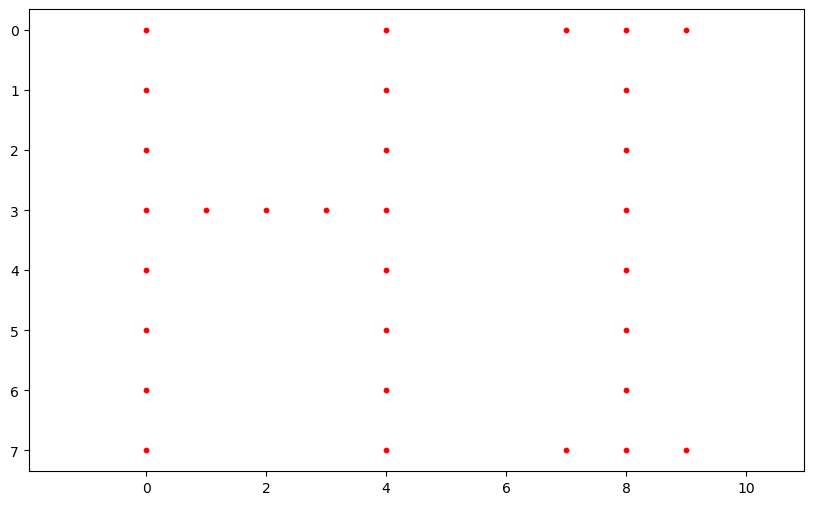

In [6]:
import re
import matplotlib.pyplot as plt

def parse_input(input_data):
    """Parse the input data to extract positions and velocities."""
    pattern = re.compile(r"position=<\s*(-?\d+),\s*(-?\d+)> velocity=<\s*(-?\d+),\s*(-?\d+)>")
    points = []
    for line in input_data.strip().split("\n"):
        match = pattern.match(line)
        if match:
            x, y, vx, vy = map(int, match.groups())
            points.append(((x, y), (vx, vy)))
    return points

def get_bounds(points):
    """Calculate the bounds of the points."""
    xs = [x for (x, y), _ in points]
    ys = [y for (x, y), _ in points]
    return min(xs), max(xs), min(ys), max(ys)

def simulate(points):
    """Simulate the points moving over time to find when they align closely."""
    time = 0
    best_time = 0
    smallest_area = float('inf')
    best_points = None

    while True:
        # Calculate bounds and area
        min_x, max_x, min_y, max_y = get_bounds(points)
        area = (max_x - min_x) * (max_y - min_y)

        # Update if this is the smallest area
        if area < smallest_area:
            smallest_area = area
            best_time = time
            best_points = points[:]
        else:
            # If area starts increasing, stop the simulation
            break

        # Move points
        points = [((x + vx, y + vy), (vx, vy)) for (x, y), (vx, vy) in points]
        time += 1

    return best_time, best_points

def display_points_as_grid(points):
    """Display the points as a grid for a human-readable format."""
    min_x, max_x, min_y, max_y = get_bounds(points)
    point_set = {(x, y) for (x, y), _ in points}

    grid = []
    for y in range(min_y, max_y + 1):
        row = ""
        for x in range(min_x, max_x + 1):
            row += "#" if (x, y) in point_set else "."
        grid.append(row)

    return "\n".join(grid)

def display_points(points):
    """Display the points in a 2D plot."""
    xs = [x for (x, y), _ in points]
    ys = [y for (x, y), _ in points]
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, c='red', s=10)
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()

# Input data
input_data = """position=< 9,  1> velocity=< 0,  2>
position=< 7,  0> velocity=<-1,  0>
position=< 3, -2> velocity=<-1,  1>
position=< 6, 10> velocity=<-2, -1>
position=< 2, -4> velocity=< 2,  2>
position=<-6, 10> velocity=< 2, -2>
position=< 1,  8> velocity=< 1, -1>
position=< 1,  7> velocity=< 1,  0>
position=<-3, 11> velocity=< 1, -2>
position=< 7,  6> velocity=<-1, -1>
position=<-2,  3> velocity=< 1,  0>
position=<-4,  3> velocity=< 2,  0>
position=<10, -3> velocity=<-1,  1>
position=< 5, 11> velocity=< 1, -2>
position=< 4,  7> velocity=< 0, -1>
position=< 8, -2> velocity=< 0,  1>
position=<15,  0> velocity=<-2,  0>
position=< 1,  6> velocity=< 1,  0>
position=< 8,  9> velocity=< 0, -1>
position=< 3,  3> velocity=<-1,  1>
position=< 0,  5> velocity=< 0, -1>
position=<-2,  2> velocity=< 2,  0>
position=< 5, -2> velocity=< 1,  2>
position=< 1,  4> velocity=< 2,  1>
position=<-2,  7> velocity=< 2, -2>
position=< 3,  6> velocity=<-1, -1>
position=< 5,  0> velocity=< 1,  0>
position=<-6,  0> velocity=< 2,  0>
position=< 5,  9> velocity=< 1, -2>
position=<14,  7> velocity=<-2,  0>
position=<-3,  6> velocity=< 2, -1>"""

# Process input and simulate
points = parse_input(input_data)
best_time, best_points = simulate(points)

# Display results
print(f"The points align closely at time = {best_time} seconds.")
print("\nAligned Points:")
print(display_points_as_grid(best_points))

display_points(best_points)


In [7]:
from rich import print

def parse_input(data):
    robots = []
    for line in data:
        p, v = line.strip().split(' ')
        px, py = map(int, p[2:].split(','))
        vx, vy = map(int, v[2:].split(','))
        robots.append(((px, py), (vx, vy)))
    return robots

def move_robot(position, velocity, width, height):
    x, y = position
    vx, vy = velocity
    x = (x + vx) % width
    y = (y + vy) % height
    return (x, y)

def simulate_robots(robots, width, height, seconds):
    for _ in range(seconds):
        robots = [(move_robot(p, v, width, height), v) for p, v in robots]
    return robots

def count_robots_in_quadrants(robots, width, height):
    mid_x, mid_y = width // 2, height // 2
    quadrants = [0, 0, 0, 0]
    for (x, y), _ in robots:
        if x == mid_x or y == mid_y:
            continue
        if x < mid_x and y < mid_y:
            quadrants[0] += 1
        elif x >= mid_x and y < mid_y:
            quadrants[1] += 1
        elif x < mid_x and y >= mid_y:
            quadrants[2] += 1
        elif x >= mid_x and y >= mid_y:
            quadrants[3] += 1
    return quadrants

def check_christmas_tree_pattern(robots, width, height):
    tree_pattern = [
        "....#....",
        "...###...",
        "..#####..",
        ".#######.",
        "#########",
        "....#....",
        "....#...."
    ]

    grid = [['.' for _ in range(width)] for _ in range(height)]
    for (x, y), _ in robots:
        grid[y][x] = '#'

    pattern_height = len(tree_pattern)
    pattern_width = len(tree_pattern[0])

    for y in range(height - pattern_height + 1):
        for x in range(width - pattern_width + 1):
            match = True
            for py in range(pattern_height):
                for px in range(pattern_width):
                    if tree_pattern[py][px] == '#' and grid[y + py][x + px] != '#':
                        match = False
                        break
                if not match:
                    break
            if match:
                return True
    return False

def find_easter_egg(data):
    width, height = 101, 103
    robots = parse_input(data)
    seconds = 0
    while True:
        robots = simulate_robots(robots, width, height, 1)
        seconds += 1
        if check_christmas_tree_pattern(robots, width, height):
            return seconds

def solve(data):
    width, height = 101, 103
    robots = parse_input(data)
    robots = simulate_robots(robots, width, height, 100)
    quadrants = count_robots_in_quadrants(robots, width, height)
    safety_factor = 1
    for count in quadrants:
        safety_factor *= count
    return safety_factor

def main():
    # Update this to the path of your input file
    file_path = 'D:\CODING\iCode\Advent of code\AOC-2024\Day14\input.txt'

    # Read the input data from the file
    with open(file_path, 'r') as file:
        data = file.readlines()

    print("Safety Factor:", solve(data))
    print("Seconds to Easter Egg:", find_easter_egg(data))

if __name__ == '__main__':
    main()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/abidshakir/Advent-of-Code/2024/Day-14/input.txt'